GAMBLER'S PROBLEM 

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#let us generate the mdp
theta =1e-4

v = np.zeros(101)
policy = np.zeros(101)

rew=np.zeros(101)
rew[100]=1

In [51]:
def gamble(p):
    v = np.zeros(101)
    policy = np.zeros(101)

    while True:
        delta = 0
        for x in range(1,100) :
            stakes = min(x,100-x)


            for stake in range(1,stakes+1) :
                old_v = v[x]
                new_v = p*(rew[x+stake] + v[x+stake]) + (1-p)*(rew[x-stake]+v[x-stake])
                if (new_v > old_v) : 
                    policy[x] = stake
                    v[x] = new_v
                delta = max(delta,v[x]-old_v)

        if (delta<theta) :
            break   


    v[100]=1
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(101), v, marker='o', color='orange')
    plt.title(f'Value Function (p = {p})')
    plt.xlabel('Capital')
    plt.ylabel('Value Estimates')

    plt.subplot(1, 2, 2)
    plt.bar(range(101), policy, width=0.9, color='skyblue', edgecolor='black')
    plt.title(f'Policy (p = {p})')
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    if(p>0.5):
        plt.ylim(0,10)

    plt.tight_layout()
    plt.show()

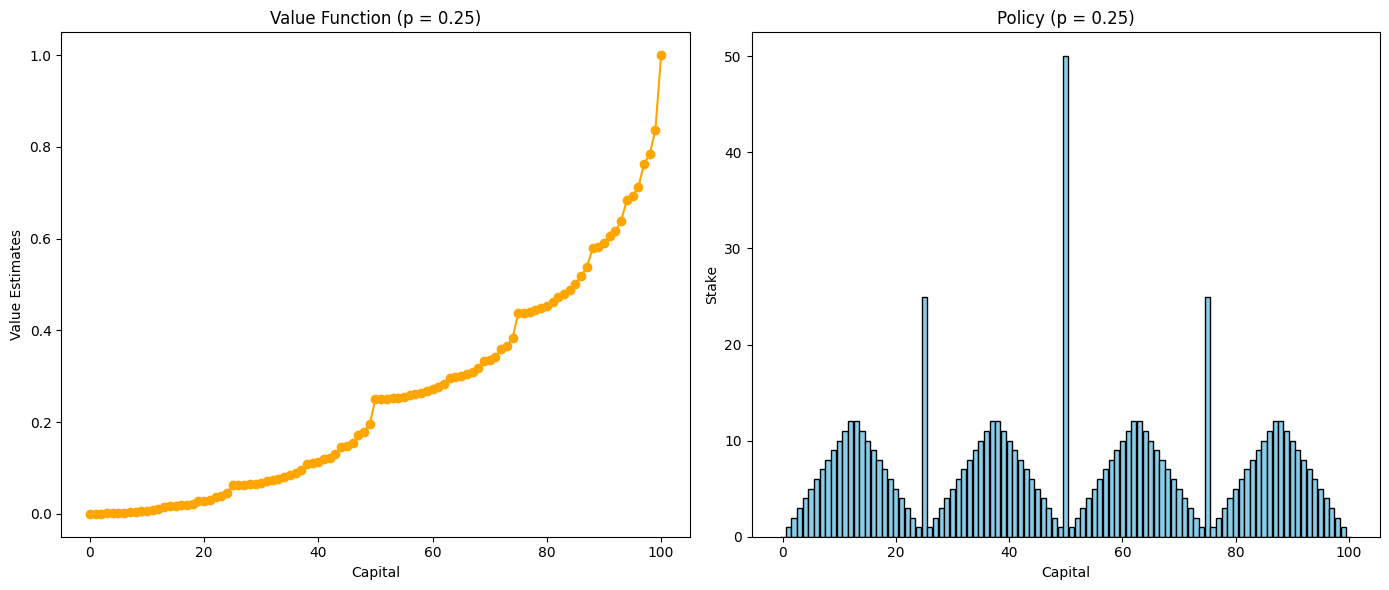

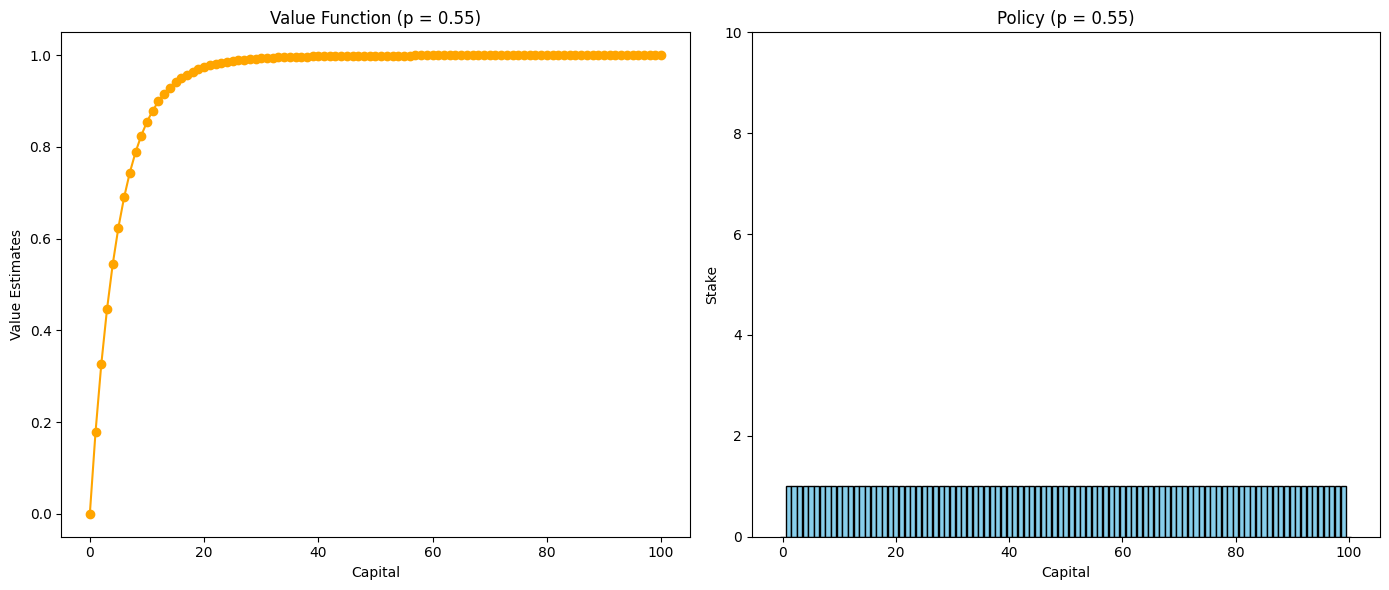

In [52]:
gamble(0.25)
gamble(0.55)